In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import re

In [2]:
#import webpage
import requests
url = 'https://www.guttmacher.org/state-policy/explore/state-policies-later-abortions'
r = requests.get(url)

In [3]:
#convert html and isolate table data
html = r.text
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', {"class": "MsoTableGrid"})
rows = table.find_all('tr')

In [4]:
#create a function to extract the table data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele for ele in cols]
    data.append([ele.text.strip() for ele in cols if ele])

In [5]:
#make a dataframe of the table data
data = pd.DataFrame(data[3:], columns=['State', 'Limit on Abortion After Viability', 'Limit on Abortion at a Specific Gestational Age', 'Life and Health', 'Life and Physical Health', 'Life', 'Attend', 'Approve', 'col9'])
data = data.iloc[:43,:8] #drop extraneous rows and columns
data = data.set_index('State')
column_names = [np.array(['State Restrictions on Later Abortion', 'State Restrictions on Later Abortion', 'Exceptions', 'Exceptions', 'Exceptions', 'When a Later Abortion is Performed a Second Physician Must:', 'When a Later Abortion is Performed a Second Physician Must:']),
          np.array(['Limit on Abortion After Viability', 'Limit on Abortion at a Specific Gestational Age', 'Life and Health', 'Life and Physical Health', 'Life', 'Attend', 'Approve'])]
data.columns = column_names

In [6]:
data.head()

State Restrictions on Later Abortion  \
               Limit on Abortion After Viability   
State                                              
Alabama                                            
Arizona                                        X   
Arkansas                                           
California                                     X   
Connecticut                                    X   

                                                                 Exceptions  \
            Limit on Abortion at a Specific Gestational Age Life and Health   
State                                                                         
Alabama                         20 weeks postfertilization*                   
Arizona                                                   ▼              XΨ   
Arkansas                        20 weeks postfertilization*                   
California                                                                X   
Connecticut                                                               X   

                                           \
            Life and Physical Health Life   
State                                       
Alabama                           XΨ        
Arizona                                     
Arkansas                        X†,Ψ        
California                                  
Connecticut                                 

            When a Later Abortion is Performed a Second Physician Must:  \
                                                                 Attend   
State                                                                     
Alabama                                          Postviability            
Arizona                                          Postviability            
Arkansas                                         Postviability            
California                                                                
Connecticut                                                               

                            
                   Approve  
State                       
Alabama      Postviability  
Arizona                     
Arkansas                    
California                  
Connecticut

In [13]:
#create combined Restrictions column
data['Restrictions'] = data.loc[:,('State Restrictions on Later Abortion','Limit on Abortion After Viability')]+data.loc[:,('State Restrictions on Later Abortion','Limit on Abortion at a Specific Gestational Age')]
data['Restrictions'] = data.loc[:,('Restrictions')].replace(["X", "X▼"], ["After Viability", "After Viability▼"])
#data['Restrictions2'] = data.loc[:,('Restrictions')].replace("^V+", "test")
#create combined Except column
data['Except'] = data['Exceptions']['Life and Physical Health'].str.replace(r'X+', 'Life and Physical Health')+data['Exceptions']['Life and Health'].str.replace(r'X+', 'Life and Health')+data['Exceptions']['Life'].str.replace(r'X+', 'Life')
#data['Except2'] = data['Exceptions']['Life and Physical Health'].str.replace(r'X+', 'Life and Physical Health')+final['Exceptions']['Life and Health'].str.replace(r'X+', 'Life and Health')+final['Exceptions']['Life'].str.replace(r'X+', 'Life')
#create combined Later column
data['Later'] = data['When a Later Abortion is Performed a Second Physician Must:']['Attend'].str.replace(r'X+', 'Attend').str.replace('Postviability', 'Attend Postviability').str.replace('20 weeks', 'Attend past 20 weeks')+data['When a Later Abortion is Performed a Second Physician Must:']['Approve'].str.replace(r'X+', 'Approve').str.replace('Postviability', 'Approve Postviability').str.replace('▼', 'Approve▼')
data['Later'] = data['Later'].str.replace('AttendApprove', 'Approve and Attend').str.replace('Attend PostviabilityApprove Postviability', 'Approve and Attend Postviability')
#data['Later2'] = data['Later'].str.replace('AttendApprove', 'Approve & Attend').str.replace('Attend PostviabilityApprove Postviability', 'Approve & Attend Postviability')

In [17]:
data.head()

State Restrictions on Later Abortion  \
               Limit on Abortion After Viability   
State                                              
Alabama                                            
Arizona                                        X   
Arkansas                                           
California                                     X   
Connecticut                                    X   

                                                                 Exceptions  \
            Limit on Abortion at a Specific Gestational Age Life and Health   
State                                                                         
Alabama                         20 weeks postfertilization*                   
Arizona                                                   ▼              XΨ   
Arkansas                        20 weeks postfertilization*                   
California                                                                X   
Connecticut                                                               X   

                                           \
            Life and Physical Health Life   
State                                       
Alabama                           XΨ        
Arizona                                     
Arkansas                        X†,Ψ        
California                                  
Connecticut                                 

            When a Later Abortion is Performed a Second Physician Must:  \
                                                                 Attend   
State                                                                     
Alabama                                          Postviability            
Arizona                                          Postviability            
Arkansas                                         Postviability            
California                                                                
Connecticut                                                               

                                           Restrictions  \
                   Approve                                
State                                                     
Alabama      Postviability  20 weeks postfertilization*   
Arizona                                After Viability▼   
Arkansas                    20 weeks postfertilization*   
California                              After Viability   
Connecticut                             After Viability   

                                  Except                             Later  
                                                                            
State                                                                       
Alabama        Life and Physical HealthΨ  Approve and Attend Postviability  
Arizona                 Life and HealthΨ              Attend Postviability  
Arkansas     Life and Physical Health†,Ψ              Attend Postviability  
California               Life and Health                                    
Connecticut              Life and Health

In [18]:
data2 = data.iloc[:,-3:].reset_index()
data2.columns = [''.join(col) for col in data2.columns]
data2.head()

,State,Restrictions,Except,Later
0,Alabama,20 weeks postfertilization*,Life and Physical HealthΨ,Approve and Attend Postviability
1,Arizona,After Viability▼,Life and HealthΨ,Attend Postviability
2,Arkansas,20 weeks postfertilization*,"Life and Physical Health†,Ψ",Attend Postviability
3,California,After Viability,Life and Health,
4,Connecticut,After Viability,Life and Health,


In [20]:
#Count occurrances
data2.iloc[:,1:4].apply(pd.Series.value_counts).reset_index()

,index,Restrictions,Except,Later
0,,NaN,NaN,22.0
1,20 weeks LMP,1.0,NaN,NaN
2,20 weeks LMP*,1.0,NaN,NaN
3,20 weeks postfertilization*,15.0,NaN,NaN
4,22 weeks LMP*,2.0,NaN,NaN
5,24 weeks LMP,3.0,NaN,NaN
6,24 weeks post-implantation,1.0,NaN,NaN
7,24 weeks postfertilization,1.0,NaN,NaN
8,24 weeks postfertilization£​,1.0,NaN,NaN
9,3rd trimester LMP,1.0,NaN,NaN


In [54]:
#get rid of notation marks
data2['Restrictions2'] = data2['Restrictions'].str.replace('[^a-zA-Z0-9 \n\.]', '')
data2['Except2'] = data2['Except'].str.replace('[^a-zA-Z0-9 \n\.]', '')
data2['Later2'] = data2['Later'].str.replace('[^a-zA-Z0-9 \n\.]', '')
data2['Restrictions2'] = data2['Restrictions'].str.replace(' postfertilization','').str.replace(' LMP','').str.replace(' postimplantation', '')
data2['Later2'] = data2['Later'].str.replace(' Postviability', '').str.replace(' past 20 weeks', '')
data2

,State,Restrictions,Except,Later,Restrictions2,Except2,Later2
0,Alabama,20 weeks postfertilization*,Life and Physical HealthΨ,Approve and Attend Postviability,20 weeks*,Life and Physical Health,Approve and Attend
1,Arizona,Viability▼,Life and HealthΨ,Attend Postviability,Viability▼,Life and Health,Attend
2,Arkansas,20 weeks postfertilization*,"Life and Physical Health†,Ψ",Attend Postviability,20 weeks*,Life and Physical Health,Attend
3,California,Viability,Life and Health,,Viability,Life and Health,
4,Connecticut,Viability,Life and Health,,Viability,Life and Health,
5,Delaware,Viability,Life and Health‡​,Approve▼,Viability,Life and Health,Approve▼
6,Florida,24 weeks LMP,Life and Physical HealthΨ,Approve,24 weeks,Life and Physical Health,Approve
7,Georgia,20 weeks postfertilization*,"Life and Physical Health‡​,Ψ",,20 weeks*,Life and Physical Health,
8,Hawaii,Viability,Life and Health,,Viability,Life and Health,
9,Idaho,Viability▼,Life,Approve Postviability,Viability▼,Life,Approve


In [55]:
regions = pd.read_csv("state_table.csv")
data2 = data2.join(regions, rsuffix='_regions')

FileNotFoundError: File b'state_table.csv' does not exist

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
test2 = test.iloc[:,1:4].apply(LabelEncoder().fit_transform)
model = PCA(n_components=2)
model.fit(test2)
test2d = model.transform(test2)
#add PCA back to dataframe
test['PCA1'] = test2d[:, 0]
test['PCA2'] = test2d[:, 1]

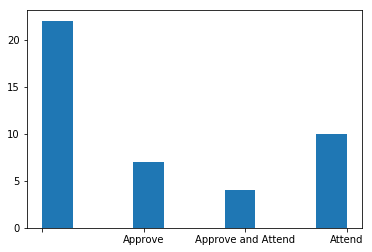

In [1585]:
plt.hist(test.Later)
plt.show()

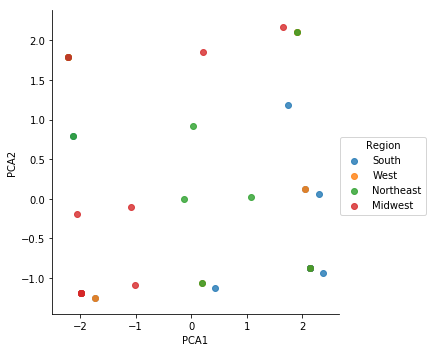

In [1500]:
import seaborn as sns
sns.lmplot("PCA1", "PCA2", hue="Region", data=test, fit_reg=False)
plt.show()

In [1501]:
#describe last three columns
final.iloc[:,-3:].describe()

,Restrictions,Except,Later
,,,
count,43,43,43
unique,11,10,9
top,Viability,Life and Health,
freq,15,12,22


In [1502]:
final.head()

State Restrictions on Later Abortion  \
               Limit on Abortion After Viability   
State                                              
Alabama                                            
Arizona                                        X   
Arkansas                                           
California                                     X   
Connecticut                                    X   

                                                                 Exceptions  \
            Limit on Abortion at a Specific Gestational Age Life and Health   
State                                                                         
Alabama                         20 weeks postfertilization*                   
Arizona                                                   ▼              XΨ   
Arkansas                        20 weeks postfertilization*                   
California                                                                X   
Connecticut                                                               X   

                                           \
            Life and Physical Health Life   
State                                       
Alabama                           XΨ        
Arizona                                     
Arkansas                        X†,Ψ        
California                                  
Connecticut                                 

            When a Later Abortion is Performed a Second Physician Must:  \
                                                                 Attend   
State                                                                     
Alabama                                          Postviability            
Arizona                                          Postviability            
Arkansas                                         Postviability            
California                                                                
Connecticut                                                               

                                           Restrictions  \
                   Approve                                
State                                                     
Alabama      Postviability  20 weeks postfertilization*   
Arizona                                      Viability▼   
Arkansas                    20 weeks postfertilization*   
California                                    Viability   
Connecticut                                   Viability   

                                  Except                             Later  
                                                                            
State                                                                       
Alabama        Life and Physical HealthΨ  Approve and Attend Postviability  
Arizona                 Life and HealthΨ              Attend Postviability  
Arkansas     Life and Physical Health†,Ψ              Attend Postviability  
California               Life and Health                                    
Connecticut              Life and Health

In [1503]:
final.xs('Limit on Abortion After Viability', axis=1, level=1, drop_level=False)

,State Restrictions on Later Abortion
,Limit on Abortion After Viability
State,
Alabama,
Arizona,X
Arkansas,
California,X
Connecticut,X
Delaware,X
Florida,
Georgia,


In [1504]:
#reset index to fix column names & delete empty values
final2 = final.iloc[:,-3:].reset_index()
final2 = final2.replace(r'^\s*$', np.nan, regex=True)

In [1505]:
final2.head(10)

,State,Restrictions,Except,Later
,,,,
0,Alabama,20 weeks postfertilization*,Life and Physical HealthΨ,Approve and Attend Postviability
1,Arizona,Viability▼,Life and HealthΨ,Attend Postviability
2,Arkansas,20 weeks postfertilization*,"Life and Physical Health†,Ψ",Attend Postviability
3,California,Viability,Life and Health,NaN
4,Connecticut,Viability,Life and Health,NaN
5,Delaware,Viability,Life and Health‡​,Approve▼
6,Florida,24 weeks LMP,Life and Physical HealthΨ,Approve
7,Georgia,20 weeks postfertilization*,"Life and Physical Health‡​,Ψ",NaN
8,Hawaii,Viability,Life and Health,NaN


In [1506]:
final2.describe()

,State,Restrictions,Except,Later
,,,,
count,43,43,43,21
unique,43,11,10,8
top,Michigan,Viability,Life and Health,Attend
freq,1,15,12,5


In [1507]:
#count values in final2's key columns
test.iloc[:,1:4].apply(pd.Series.value_counts).reset_index()

,index,Restrictions,Except,Later
0,,NaN,NaN,22.0
1,20 weeks,17.0,NaN,NaN
2,22 weeks,2.0,NaN,NaN
3,24 weeks,6.0,NaN,NaN
4,3rd trimester,1.0,NaN,NaN
5,Approve,NaN,NaN,7.0
6,Approve and Attend,NaN,NaN,4.0
7,Attend,NaN,NaN,10.0
8,Life,NaN,4.0,NaN
9,Life and Health,NaN,19.0,NaN


In [9]:
restrictions = final2['Restrictions'].unique()
restrictions.sort()
for index, item in enumerate(restrictions):
    if item == '20 weeks LMP':
        print('20 weeks LMP')
    if item == '20 weeks LMP*':
        print('20 weeks')

NameError: name 'final2' is not defined

In [1]:
final2.values_count()

NameError: name 'final2' is not defined

In [1081]:
final2.dropna().melt(id_vars="State", var_name="Type", value_name="Result").sort_values(by="State")

,State,Type,Result
0,Alabama,Restrictions,20 weeks postfertilization*
21,Alabama,Except,Life and Physical HealthΨ
42,Alabama,Later,Attend & Approve Postviability
1,Arizona,Restrictions,Viability▼
22,Arizona,Except,Life and HealthΨ
43,Arizona,Later,Attend Postviability
2,Arkansas,Restrictions,20 weeks postfertilization*
23,Arkansas,Except,"Life and Physical Health†,Ψ"
44,Arkansas,Later,Attend Postviability
3,Delaware,Restrictions,Viability


In [2]:
import json
import folium

In [3]:
map_osm = folium.Map(location=[32.2077, -86.1752])
map_osm

In [1535]:
test.Restrictions

0          20 weeks
1         Viability
2          20 weeks
3         Viability
4         Viability
5         Viability
6          24 weeks
7          20 weeks
8         Viability
9         Viability
10        Viability
11         20 weeks
12         20 weeks
13         22 weeks
14         20 weeks
15         20 weeks
16        Viability
17        Viability
18         24 weeks
19        Viability
20        Viability
21         20 weeks
22        Viability
23        Viability
24         20 weeks
25         24 weeks
26         24 weeks
27         20 weeks
28         20 weeks
29         20 weeks
30         20 weeks
31         24 weeks
32         24 weeks
33         20 weeks
34         20 weeks
35        Viability
36         20 weeks
37        Viability
38    3rd trimester
39        Viability
40         22 weeks
41         20 weeks
42        Viability
Name: Restrictions, dtype: object

In [1550]:
state_geo = r'us-states.json'
map = folium.Map(location=[48, -102], zoom_start=3)
map.choropleth(
    geo_data=state_geo,
    data=test,
    columns=['Restrictions', 'PCA1'],
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Unemployment Rate (%)',
    reset=True
)
map